In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

%matplotlib inline

In [2]:
def pdftarget(x, normed=1):
    return np.exp(0.4*(x - 0.4)*(x - 0.4) - 0.08*x*x*x*x)/normed

(7.8521781788662155, 1.4333237621618567e-08)


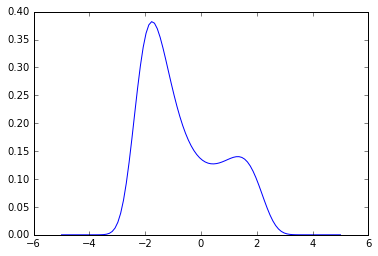

In [3]:
# integrate 
I = quad(pdftarget, -100, 100)
print I

xmin, xmax = -5, 5
N = 100
x = np.linspace(xmin, xmax, N)
y = pdftarget(x, normed=I[0])

plt.plot(x, y)

In [4]:
def sampling(mu, sigma, nsamples=1000, xmin=-5, xmax=5):
    I = quad(pdftarget, -100, 100) # integrate
    normalize = I[0]
    
    # find good propos dist
    x = np.linspace(xmin, xmax, 1000)
    target_dist = pdftarget(x, normed=normalize)
    propos_dist = norm.pdf(x, mu, sigma)
    
    xhighest_idx = np.argmax(target_dist)
    yhighest = np.amax(target_dist)
    c = 1.05*yhighest/propos_dist[xhighest_idx]
    
    # start sampling
    xsample = np.random.normal(mu, sigma, nsamples) 
    target_dist = pdftarget(xsample, normed=normalize)
    ysample = c*norm.pdf(xsample, mu, sigma)*np.random.random(nsamples)
    
    accept = ysample <= target_dist
    
    return xsample, ysample, accept, c, normalize

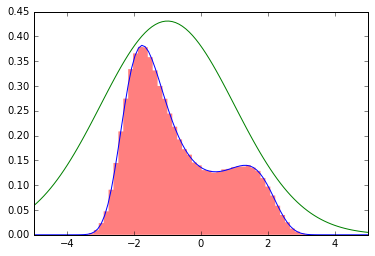

In [5]:
xsample, ysample, accept, c, normalize = sampling(-1.0, 2.0, nsamples=1000000)

I = quad(pdftarget, -100, 100)
xmin, xmax = -5, 5
N = 100
x = np.linspace(xmin, xmax, N)
target = pdftarget(x, normed=I[0])
propos = c*norm.pdf(x, -1, 2)

plt.hist(xsample[accept], bins=50, normed=1, histtype='stepfilled', linewidth=0, color='red', alpha=0.5);
plt.plot(x, target)
plt.plot(x, propos)
plt.xlim([xmin, xmax])
plt.show()

### Make an animation

In [6]:
def plot_samples(mu, sigma, xsample, ysample, accept, c, normalize, xmin=-5, xmax=5, nbins=50, write=False, filename='plot_rejection_sampling.png', trace=False):
    nsamples = len(xsample)
    ofile = '/home/ridlo/project/stats/rejection_sampling/'+filename
    
    xaccept = xsample[accept]
    n_accept = len(xaccept)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(xmin, xmax)
    
    x = np.linspace(xmin, xmax, 100) # draw target dist line
    target_dist = pdftarget(x, normed=normalize)
    propos_dist = c*norm.pdf(x, mu, sigma)
    
    ymax = 1.2*np.amax(propos_dist)
    ax.set_ylim(0, ymax)
    
    ax.plot(x, target_dist, 'k')
    ax.plot(x, propos_dist, 'g')
    
    if nsamples > 0:
        if n_accept > 0:
            ax.hist(xaccept, bins=nbins, normed=1, histtype='stepfilled', color='b', linewidth=0, alpha=0.5)
    
            if trace:
                sample_x = xsample[-1] # last sample 
                sample_y = ysample[-1]
                sample_accept = accept[-1]
                ax.axvline(x=sample_x, ymin=0, ymax=(sample_y)/(ymax), c='k')
                ax.axhline(y=sample_y, xmin=xmin, xmax=(sample_x-xmin)/(xmax-xmin), c='k')
                if sample_accept:
                    ax.plot(sample_x, sample_y, 'k.')
                else:
                    ax.plot(sample_x, sample_y, 'r.')

            rate_accept = float(n_accept)/float(nsamples)
            text = r'$n_{sample} = '+'{0:d}$'.format(nsamples)+'\n'
            text += r'$r_{accept} = '+'{0:0.2f}$'.format(rate_accept)
            ax.annotate(text, xy=(0.7, 0.97), xycoords='axes fraction', ha='left', va='top') 
    
    if write:
        plt.savefig(ofile, bbox_inches='tight', dpi=300); plt.close()
    else:
        plt.show(); plt.close()

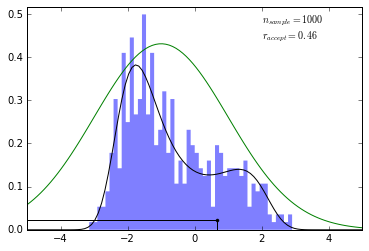

In [7]:
# test
mu = -1.0
sigma = 2.0
nsamp = 1000
xsample, ysample, accept, c, normalize = sampling(mu, sigma, nsamples=nsamp)
plot_samples(mu, sigma, xsample, ysample, accept, c, normalize, trace=True)

In [9]:
# animation plot
# make an animation
mu = -1.0
sigma = 2.0
nsample = 1000
xsample, ysample, accept, c, normalize = sampling(mu, sigma, nsamples=nsample)
divisor = 10

for i in range(nsample):
    plot_samples(mu, sigma,
                xsample[0:i], 
                ysample[0:i], 
                accept[0:i], 
                c, normalize,
                write=True,
                filename='plotsample_nsamp_{0:04d}.png'.format(i),
                trace=True)
    
    if (((i+1) % divisor) == 0):
        print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [2]:
from IPython.display import YouTubeVideo

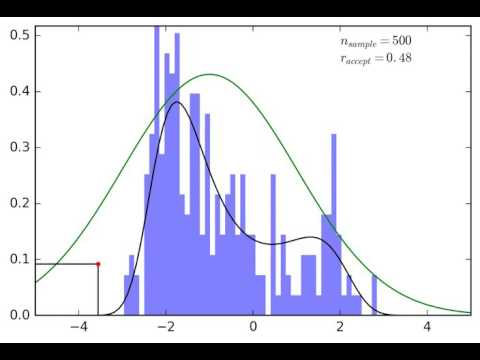

In [3]:
YouTubeVideo("M_kyGLaqqgQ")

### References

- SEAYAC Workshop, *MC methods in astronomy*, Tri L. Astraatmadja (MPIA Heidelberg)
    Krabi, 4 December 2015